In [25]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Bidirectional, GRU

In [26]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [27]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [ ]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [28]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання GRU шару з 32 вузлами
# model.add(GRU(32))

# Додавання декількох Bidirectional LSTM шару з 32 вузлами
model.add(Bidirectional(LSTM(32, return_sequences=True)))

# Додавання SimpleRNN шару з 32 вузлами
model.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану) і
# return_sequences=True для першого шару, щоб надати послідовність як вхід на наступний шар

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [29]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [30]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_3 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 [==============================] - 244s 2s/step - loss: 0.6293 - acc: 0.6171 - val_loss: 0.5446 - val_acc: 0.7352
Epoch 2/5
137/137 [==============================] - 230s 2s/step - loss: 0.3884 - acc: 0.8390 - val_loss: 0.3245 - val_acc: 0.8661
Epoch 3/5
137/137 [==============================] - 238s 2s/step - loss: 0.2821 - acc: 0.8886 - val_loss: 0.3295 - val_acc: 0.8695
Epoch 4/5
137/137 [==============================] - 234s 2s/step - loss: 0.2311 - acc: 0.9122 - val_loss: 0.3009 - val_acc: 0.8849
Epoch 5/5
137/137 [==============================] - 233s 2s/step - loss: 0.1927 - acc: 0.9286 - val_loss: 0.3058 - val_acc: 0.8788


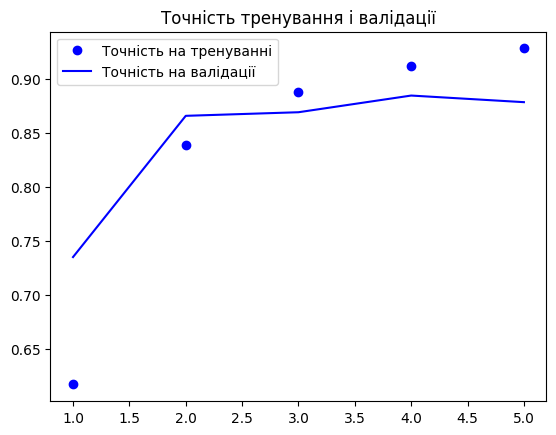

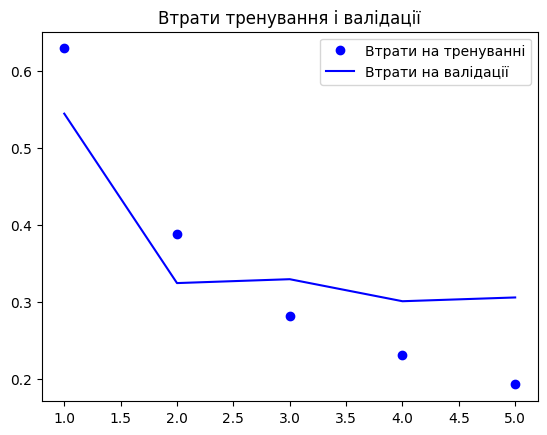

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [ ]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 135s 170ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 131s 168ms/step - loss: 0.3174 - acc: 0.8748
Test Loss: 0.3173706531524658
Test Accuracy: 0.8748400211334229


На мій погляд а я ще без досвіду бачу різницу тільки у втратах та точністі у моделі BRNN 40% втрат та 85% точність.  Між GRU та LSTM різніца була не великой але у DRNN бачу втрат майже 32% та точність 87%